In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/alejandro/.dev/tda_2023Q1/tp2/src
Agrego el src


In [2]:
from data import generate_random_data
from bruteforce import bruteforce, pack
from utils import perform_time_test

import matplotlib.pyplot as plt
import pandas as pd
import random
from collections.abc import Iterable
from multiprocessing import Pool

In [3]:
generate_random_data()

[0.91, 0.86, 0.88, 0.82, 0.57, 0.71, 0.72, 0.91, 0.13, 0.52]

In [4]:
def ratio_f(n, data):
    result_Z, _ = perform_time_test(bruteforce, data)
    result_A, _ = perform_time_test(pack, data)
    
    return n, len(result_A), len(result_Z), len(result_A)/len(result_Z)


def test_ratio(nsets: Iterable[float], pool_size=1):
    ns = []
    approximate_results = []
    exact_results = []
    ratio_results = []

    async_responses = []
    
    with Pool(pool_size) as p:
        for data in nsets:
            nlen = len(data)
            #print(f'Llamo con {nlen} y {data}')
            async_res = p.apply_async(ratio_f, args=(nlen, data))
            #print(f'Obtuve como resultado de {nlen} en {exe_time}')
            async_responses.append(async_res)
            #time_results.append(exe_time)
            #ns.append(nlen)

        for async_res in async_responses:
            async_res.wait()
            n, result_approx, result_exact, ratio = async_res.get()
            ns.append(n)
            approximate_results.append(result_approx)
            exact_results.append(result_exact)
            ratio_results.append(ratio)

    df = pd.DataFrame({'n': ns, 'approx': approximate_results, 'optimal': exact_results, 'ratio': ratio_results})
    return df

In [5]:
%%time
min_n = 6
max_n = 10
total_tests = 40

testdata = (generate_random_data(length=random.randint(min_n, max_n)) for i in range(total_tests))
#list(testdata)
    
df_test = test_ratio(nsets=testdata, pool_size=4)
df_test

CPU times: user 9.63 ms, sys: 33.4 ms, total: 43 ms
Wall time: 14.2 s


,n,approx,optimal,ratio
0,7,5,5,1.000000
1,7,6,6,1.000000
2,9,5,4,1.250000
3,9,5,4,1.250000
4,9,6,4,1.500000
5,10,6,6,1.000000
6,6,5,4,1.250000
7,6,5,5,1.000000
8,8,6,6,1.000000
9,9,6,6,1.000000


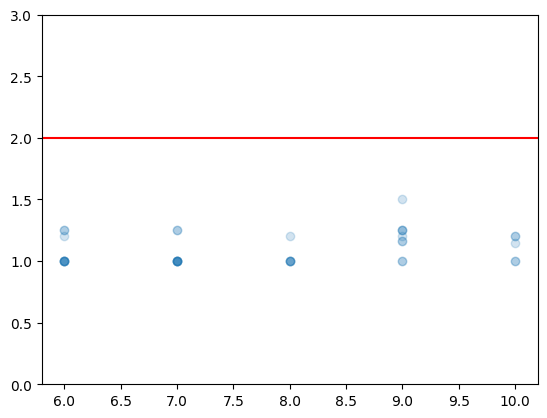

In [6]:
plt.scatter(df_test['n'], df_test['ratio'], alpha=0.2)
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.ylim(0, 3)
plt.show()